In [13]:
import pandas as pd

# Load structured data
outcomes_file = "data/data_1/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/Outcomes-a.txt"
outcomes_df = pd.read_csv(outcomes_file)
print(outcomes_df.head())
print(outcomes_df.info())


ModuleNotFoundError: No module named 'pandas'

In [19]:
import os

# Define folder path
set_a_folder = "data/data_1/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/set-a"

# Create an empty list to store patient data
patient_data_list = []

# Loop through all patient files
for filename in os.listdir(set_a_folder):
    if filename.endswith(".txt"):  # Ensure processing only text files
        file_path = os.path.join(set_a_folder, filename)
        
        # Read patient file
        patient_df = pd.read_csv(file_path)
        
        # Extract RecordID
        record_id = patient_df.loc[patient_df['Parameter'] == 'RecordID', 'Value'].values[0]
        
        # Pivot with aggregation to avoid duplicates
        patient_df = patient_df.pivot_table(index='Time', columns='Parameter', values='Value', aggfunc='first')
        
        # Reset index
        patient_df.reset_index(inplace=True)

        # Ensure 'RecordID' is not already in the DataFrame
        if 'RecordID' in patient_df.columns:
            patient_df.drop(columns=['RecordID'], inplace=True)
        
        # Add RecordID as the first column
        patient_df.insert(0, "RecordID", record_id)
        
        # Store in list
        patient_data_list.append(patient_df)

# Combine all patient data into a single DataFrame
patients_df = pd.concat(patient_data_list, ignore_index=True)

# Merge patient data with outcome data
merged_df = patients_df.merge(outcomes_df, on="RecordID", how="left")
print(f"Num of Records: {patients_df.shape[0]}")
print(f"Num of Patients: {len(patients_df["RecordID"].unique())}")
patients_df.head(10)

Num of Records: 299264
Num of Patients: 4000


Parameter,RecordID,Time,Age,BUN,Creatinine,GCS,Gender,Glucose,HCO3,HCT,...,pH,ALP,ALT,AST,Albumin,Bilirubin,Lactate,Cholesterol,TroponinI,TroponinT
0,132539.0,00:00,54.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132539.0,00:07,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132539.0,00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132539.0,01:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132539.0,02:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,132539.0,03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,132539.0,03:37,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,132539.0,04:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,132539.0,05:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,132539.0,07:37,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#summary statistics
print(merged_df.describe())

            RecordID          Age           BUN    Creatinine           GCS  \
count  299264.000000  4000.000000  13907.000000  13974.000000  61563.000000   
mean   137611.362259    64.247500     27.417157      1.505374     11.398714   
std      2918.552296    17.560946     23.398845      1.636429      3.973416   
min    132539.000000    15.000000      0.000000      0.100000      3.000000   
25%    135086.000000    52.750000     13.000000      0.700000      8.000000   
50%    137624.000000    67.000000     20.000000      1.000000     13.000000   
75%    140104.000000    78.000000     33.000000      1.500000     15.000000   
max    142673.000000    90.000000    197.000000     22.100000     15.000000   

            Gender       Glucose          HCO3           HCT             HR  \
count  4000.000000  13011.000000  13601.000000  18257.000000  228538.000000   
mean      0.560750    141.432403     23.115624     30.679504      87.517442   
std       0.497867     67.411233      4.711726     

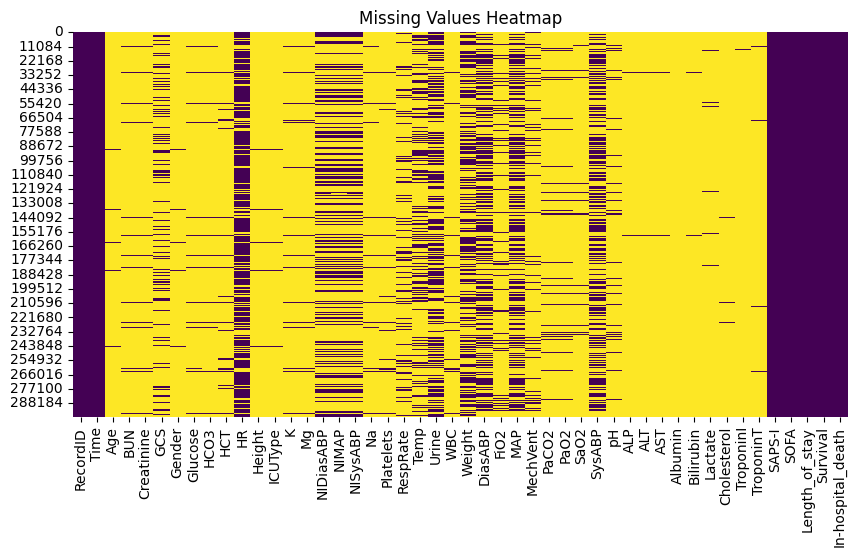

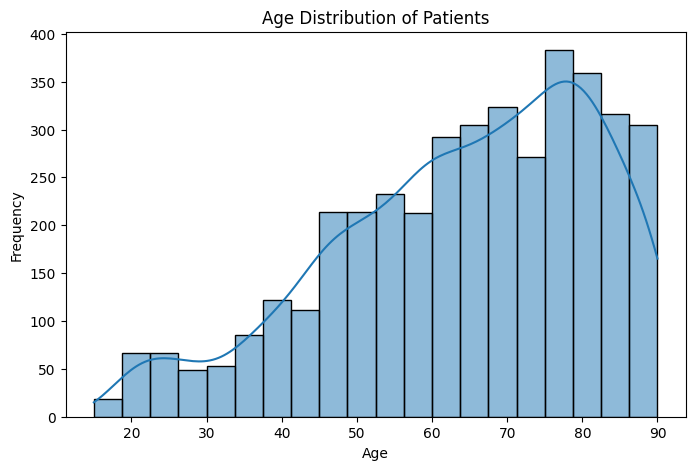

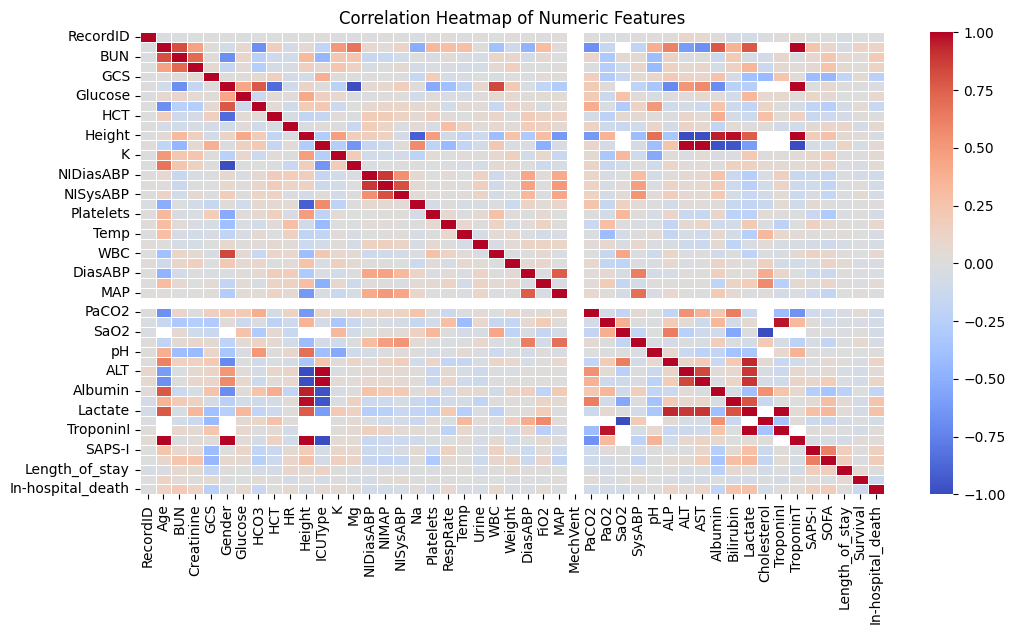

Text(0.5, 1.0, 'Survival vs. In-Hospital Death')

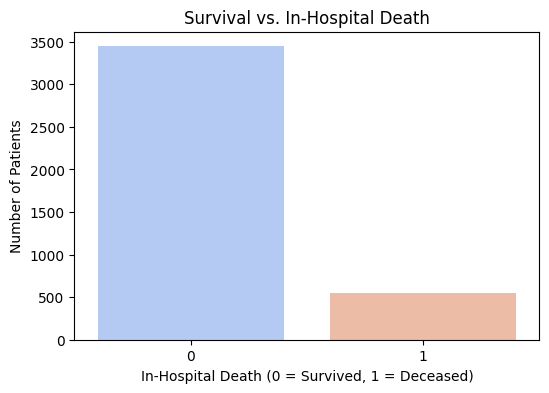

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(merged_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Distribution of patient ages
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of vital signs and lab results
numeric_cols = merged_df.select_dtypes(include=['number']).columns
correlation_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Count survival vs in-hospital death
plt.figure(figsize=(6, 4))
sns.countplot(data=outcomes_df, x="In-hospital_death", hue="In-hospital_death", legend=False, palette="coolwarm")
plt.xlabel("In-Hospital Death (0 = Survived, 1 = Deceased)")
plt.ylabel("Number of Patients")
plt.title("Survival vs. In-Hospital Death")

